<a href="https://colab.research.google.com/github/Me-Rajdip/Me-Rajdip-Machine-Learning-Deep-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. The following table represents the data set along with corresponding classes.Find out the class of new data entry as follows:**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Read data from CSV file
df=pd.read_csv('/content/drive/MyDrive/Uploded Files/Q1SV_File.csv')
df.head()

# Convert data to numpy array
data = np.array(df)

# New data entry

brightness = float(input("Enter brightness: "))

saturation = float(input("Enter saturation: "))

new_entry = np.array([brightness, saturation])

# Calculate Euclidean distances
distances = np.sqrt(np.sum((data[:, :2].astype(int) - new_entry) ** 2, axis=1))

# Combine distances with corresponding classes
distances_with_classes = np.column_stack((distances, data[:, 2]))

# Sort distances and get indices
sorted_indices = np.argsort(distances_with_classes[:, 0])

# Choose the value of k
k = 3

# Get the classes of the k nearest neighbors
nearest_classes = distances_with_classes[sorted_indices[:k], 1]

# Count the occurrences of each class
class_counts = Counter(nearest_classes)

# Determine the majority class
majority_class = max(class_counts, key=class_counts.get)

print("Class of the new data entry(",brightness,",",saturation,") :",majority_class)


Enter brightness: 20
Enter saturation: 35
Class of the new data entry( 20.0 , 35.0 ) : Red


# **2. The following table represents the survey results from the 7 online stores:Find out the equation of the best-fit straight line.**

Cofficient or slope: 0.5143952407351513
Intercept: 1.8


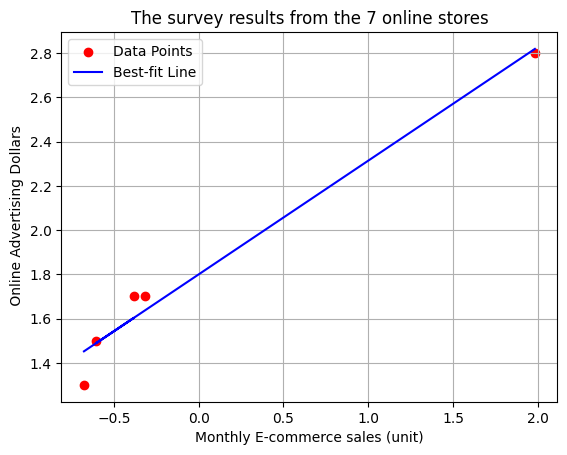

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df=pd.read_csv('/content/drive/MyDrive/Uploded Files/Q2.1CSV_File.csv')
df.head()

##Scatter plot
#plt.scatter(df['Monthly E-commerce Sales(unit)'],df['Online Advertising Dollars'])
#plt.xlabel("Monthly E-commerce Sales(unit)")
#plt.ylabel("Online Advertising Dollars")

##Correlation
df.corr()

##Seaborn for visualization
#import seaborn as sns
#sns.pairplot(df)

##Independent and dependent features
X=df[['Monthly E-commerce Sales(unit)']]##independent features should be data frame or 2 dimensional array
X.head()
#np.array(X).shape
y=df['Online Advertising Dollars']##this variable can be in serise from or 1Darray
#y


##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)
X_train.shape

##Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)
#X_test


##Apply Simple LR
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
m = regression.coef_[0]
c = regression.intercept_
print("Cofficient or slope:",m)
print("Intercept:",c)

##Plot Training data plot best fit line
#plt.scatter(X_train,y_train)
#plt.plot(X_train,regression.predict(X_train))
plt.scatter(X_train, y_train, color='red', label='Data Points')
plt.plot(X_train, m*X_train + c, color='blue', label='Best-fit Line')
plt.xlabel('Monthly E-commerce sales (unit)')
plt.ylabel(' Online Advertising Dollars')
plt.title('The survey results from the 7 online stores')
plt.legend()
plt.grid(True)
plt.show()

# 3. A company manufactures an electronic device to be used in a very wide temperature range. The company knows that increased temperature shortens the life time of the device, and a study is therefore performed in which the life time is determined as a function of temperature. The following data is found:
 Temperature in Celcius (t)
 10 20 30 40 50 60 70 80 90
 Life time in hours (y)
 420 365 285 220 176 117 69 34 5
#a) Calculate the value of Life time in hour for 95% confidence interval of
#Temperature in the usual linear regression model.
#b) Calculate the 95% confidence interval for the slope in the usual linear
#regression model, which expresses the life time as a linear function of the
#temperature.

In [ ]:
import numpy as np
from scipy import stats

# Given data
temperatures = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
life_times = np.array([420, 365, 285, 220, 176, 117, 69, 34, 5])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(temperatures, life_times)

# Calculate mean temperature
mean_temperature = np.mean(temperatures)

# Calculate sum of squares of temperatures
sum_squares_temperatures = np.sum((temperatures - mean_temperature) ** 2)

# Calculate the mean squared error (MSE)
MSE = np.mean((life_times - (intercept + slope * temperatures)) ** 2)

# Calculate the standard error of the slope
standard_error_slope = np.sqrt(MSE / sum_squares_temperatures)

# Calculate the 95% confidence interval for the slope
degrees_freedom = len(temperatures) - 2  # degrees of freedom
t_value = stats.t.ppf(0.975, degrees_freedom)  # 2-tailed t-value for 95% confidence interval
slope_lower_bound = slope - t_value * standard_error_slope
slope_upper_bound = slope + t_value * standard_error_slope

print("Slope:", slope)
print("95% Confidence Interval for the Slope:", (slope_lower_bound, slope_upper_bound))

# Calculate the 95% confidence interval for a given temperature (e.g., 95 degrees Celsius)
given_temperature = 95
predicted_life_time = intercept + slope * given_temperature
standard_error = np.sqrt(MSE * (1/len(temperatures) + (given_temperature - mean_temperature)**2 / sum_squares_temperatures))
t_value = stats.t.ppf(0.975, degrees_freedom)  # 2-tailed t-value for 95% confidence interval
lower_bound = predicted_life_time - t_value * standard_error
upper_bound = predicted_life_time + t_value * standard_error

print("Predicted Life Time for", given_temperature, "degrees Celsius:", predicted_life_time)
print("95% Confidence Interval for Predicted Life Time:", (lower_bound, upper_bound))


Slope: -5.3133333333333335
95% Confidence Interval for the Slope: (-5.846741394980178, -4.779925271686489)
Predicted Life Time for 95 degrees Celsius: -51.21111111111111
95% Confidence Interval for Predicted Life Time: (-78.8850012957598, -23.53722092646241)


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Uploded Files/Data-3.csv")
print(df)


import numpy as np
from scipy.stats import t
import scipy.stats as st

X = df[['Temperature( t )']]
y = df['Life time (Y)']
mean = X.mean()
# print("Mean =",mean)
s_d = X.std()
# print("standard deviation = ", s_d)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

dof = len(df)-1
m = lr.coef_
c = lr.intercept_
y_pred = m*X+c
t_crit = np.abs(t.ppf((1-0.95)/2,dof))

a,b=(mean-s_d*t_crit/np.sqrt(len(df)), mean+s_d*t_crit/np.sqrt(len(df)))
print("interval :" ,float(a),float(b))

##import matplotlib.pyplot as plt
##plt.scatter(X,y)
##plt.plot(X,y_pred, color="red")
##plt.xlabel("Temperature in Celcius(t)")
##plt.ylabel("Life time in hours(y)")



# Calculate the standard error of the slope
std_err_slope = np.sqrt(np.mean((y - lr.predict(X))**2) / ((len(df) - 2) * X.var()))

# Calculate the 95% confidence interval for the slope
ci_slope = (m - st.t.ppf(0.975, len(df) - 2) * std_err_slope,
             m + st.t.ppf(0.975, len(df) - 2) * std_err_slope)

# Print the confidence interval
print("95% confidence interval for the slope:", ci_slope)

   Temperature( t )  Life time (Y)
0                10            420
1                20            365
2                30            285
3                40            220
4                50            176
5                60            117
6                70             69
7                80             34
8                90              5
interval : 28.949158625700566 71.05084137429944
95% confidence interval for the slope: (Temperature( t )   -5.883571
dtype: float64, Temperature( t )   -4.743096
dtype: float64)


## **4.Evaluate the following data-set to fit a multiple linear regression model.**

Intercept: -6.867487247726785
Coefficients: [ 3.1478931  -1.65614327]


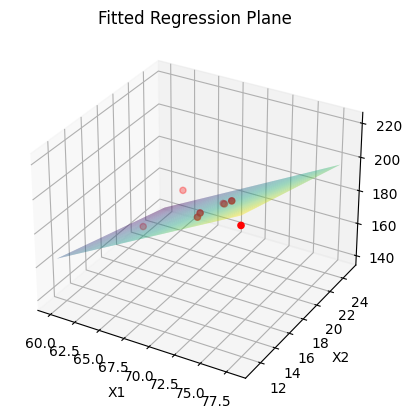

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Uploded Files/MultipleLinearRegression.csv')

# Separate the independent variables (X) and the dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']
# Fit the multiple linear regression model
model = LinearRegression().fit(X, Y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a meshgrid for X1 and X2
X1_range = np.linspace(df['X1'].min(), df['X1'].max(), 100)
X2_range = np.linspace(df['X2'].min(), df['X2'].max(), 100)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

# Calculate predicted Y values using the fitted model
Y_pred = model.intercept_ + model.coef_[0] * X1_mesh + model.coef_[1] * X2_mesh

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(df['X1'], df['X2'], df['Y'], color='red', label='Actual')

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Y_pred, alpha=0.5, cmap='viridis', label='Fitted plane')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Fitted Regression Plane')

# Add a legend
#ax.legend()

# Show the plot
plt.show()


# **4. Evaluate the following data-set to fit a multiple linear regression model.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/drive/MyDrive/Uploded Files/MultipleLinearRegression.csv')
df


# Separate the independent variables (X) and the dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 58.27613330573388
Coefficients: [ 2.42247982 -2.48685572]



# **5. The data-set of pass and fail in an exam of 5 students given in the following**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Uploded Files/LogisticRegression_data(Q-5).csv')

# Separate the features (X) and the target variable (y)
X = df[['Study_in_Houres']]
y = df['Pass(1)_Fail(0)']

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 1. Calculate the probability of pass for the students who studied 33 hours
hours_to_predict = [[33]]
probability_of_pass = log_reg.predict_proba(hours_to_predict)[:, 1][0]
print("Probability of pass for the students who studied 33 hours:", probability_of_pass)

# 2. At least how many hours student should study that makes he will pass the course with the probability of more than 95%
hours_needed = log_reg.intercept_[0] / (-log_reg.coef_[0][0])
print("At least {:.2f} hours of study are needed to have a probability of passing greater than 95%.".format(hours_needed))


Probability of pass for the students who studied 33 hours: 0.8695451255816022
At least 27.73 hours of study are needed to have a probability of passing greater than 95%.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Logistic function
def logistic_function(hours, beta0, beta1):
    return 1 / (1 + np.exp(-(beta0 + beta1 * hours)))

# Function to solve
def equation_to_solve(hours, beta0, beta1):
    return logistic_function(hours, beta0, beta1) - 0.95

# Given parameters
beta0 = -64
beta1 = 2

# Solve the equation numerically
hours_needed = fsolve(equation_to_solve, 30, args=(beta0, beta1))

print("At least {:.2f} hours of study are needed to have a probability of passing greater than 95%.".format(hours_needed[0]))


At least 56.38 hours of study are needed to have a probability of passing greater than 95%.


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# **6. Derive the decision tree using Iterative Dichotomiser (ID) 3 on the following data set:**


    Day   Outlook Temperature Humildity    Wind Play_Tennis
0    D1     Sunny         Hot      High    Weak          No
1    D2     Sunny         Hot      High  Strong          No
2    D3  Overcast         Hot      High    Weak         Yes
3    D4      Rain        Mild      High    Weak         Yes
4    D5      Rain        Cool    Nornal    Weak         Yes
5    D6      Rain        Cool    Nornal  Strong          No
6    D7  Overcast        Cool    Nornal  Strong         Yes
7    D8     Sunny        Mild      High    Weak          No
8    D9     Sunny        Cool    Nornal    Weak         Yes
9   D10      Rain        Mild    Nornal    Weak         Yes
10  D11     Sunny        Mild    Nornal  Strong         Yes
11  D12  Overcast        Mild      High  Strong         Yes
12  D13  Overcast         Hot    Nornal    Weak         Yes
13  D14      Rain        Mild      High  Strong          No
After data labeling.........
    Day  Outlook  Temperature  Humildity  Wind  Play_Tennis
0    D1    

[Text(0.4444444444444444, 0.9, 'Humildity <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'Outlook <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'Wind <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'Wind <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'Outlook <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')

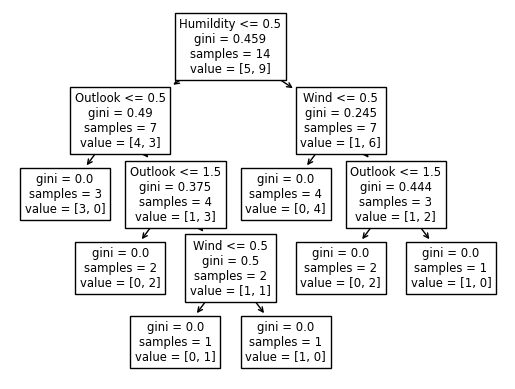

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Uploded Files/DecisionTree(Question-6).csv")
print(data)
d = {'Sunny':0,'Overcast':1,'Rain':2}
data['Outlook'] = data ['Outlook'].map(d)
d = {'Hot':0,'Mild':1,'Cool':2}
data['Temperature'] = data ['Temperature'].map(d)
d = {'High':0,'Nornal':1}
data['Humildity'] = data ['Humildity'].map(d)
d = {'Weak':0,'Strong':1}
data['Wind'] = data ['Wind'].map(d)
d = {'No':0,'Yes':1}
data['Play_Tennis'] = data ['Play_Tennis'].map(d)
print("After data labeling.........")
print(data)
features = ['Outlook','Temperature','Humildity','Wind']
X = data[features]
Y = data['Play_Tennis']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,Y)
tree.plot_tree(dtree,feature_names=features)
